In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [17]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5

In [18]:
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")


In [21]:
train = pd.read_csv("C:/Users/vysh/Downloads/airpastrain.csv")

In [22]:
test =pd.read_csv("C:/Users/vysh/Downloads/airpastest.csv")

In [23]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,1,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,3,0,0.0,satisfied


In [24]:
print(train.shape)
train.head(10)


(103904, 13)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,1,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,1,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,4,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,2,2,0,0.0,neutral or dissatisfied


In [25]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]


In [26]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)


In [27]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()


NumExpr defaulting to 8 threads.


,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
satisfaction,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000
Food_and_drink,0,0.000000


In [28]:

# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())


In [29]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

# Replace NaN with mode for categorical variables - Train and Test


Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [30]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])


In [31]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])


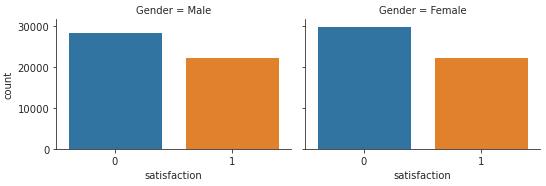

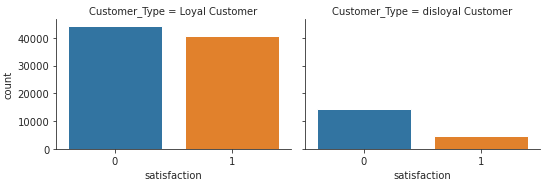

In [32]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)


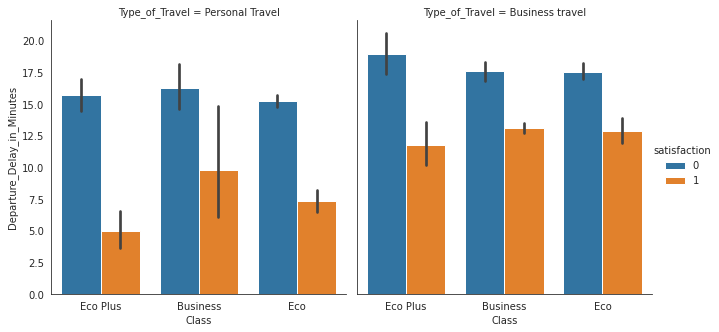

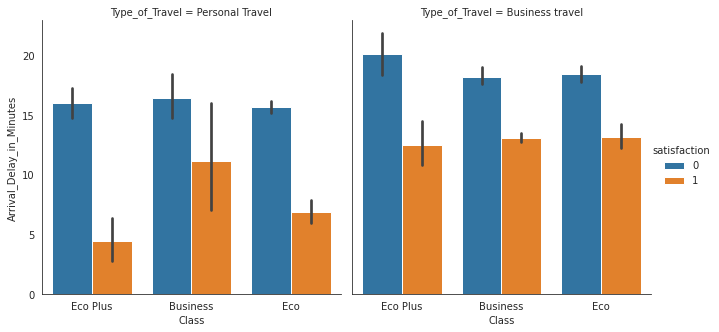

In [33]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)


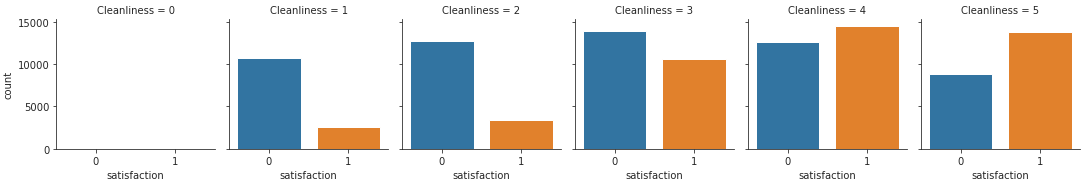

In [34]:
# Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)


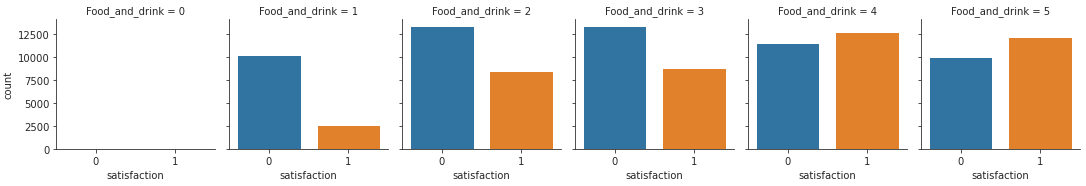

In [35]:

# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)


In [36]:

# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

train['Gender']


0         1
1         1
2         0
3         0
4         1
         ..
103899    0
103900    1
103901    1
103902    0
103903    1
Name: Gender, Length: 103904, dtype: int32

In [37]:

# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])


train.describe


<bound method NDFrame.describe of         Gender  Customer_Type  Age  Type_of_Travel  Class  Flight_Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              1   23               0      1              192   
103900       1              0   49               0      0             2347   
103901       1              1   30               0      0             1995   
103902       0              1   22               0      1             1000   
103903       1              0   27               0      0             1723   

        Inflight_wifi_service

In [38]:

features = ['Type_of_Travel','Inflight_wifi_service','Flight_Distance','Cleanliness']
target = ['satisfaction']


In [39]:
# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()


In [42]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [41]:

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken



In [43]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}



Accuracy = 0.7754850631352017
ROC Area under Curve = 0.7719859578450714
Time taken = 0.3657710552215576
              precision    recall  f1-score   support

           0    0.79945   0.80066   0.80005     14573
           1    0.74475   0.74331   0.74403     11403

    accuracy                        0.77549     25976
   macro avg    0.77210   0.77199   0.77204     25976
weighted avg    0.77544   0.77549   0.77546     25976



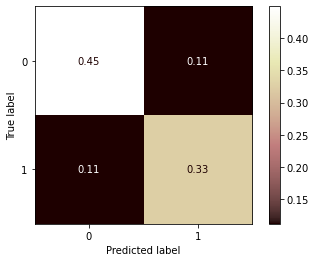

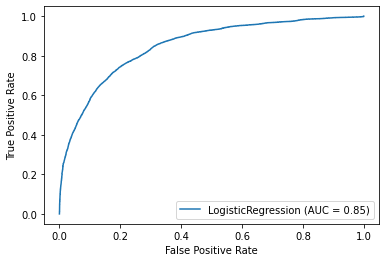

In [44]:
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

params_nb = {}


Accuracy = 0.7993532491530644
ROC Area under Curve = 0.8040934378705016
Time taken = 0.030959606170654297
              precision    recall  f1-score   support

           0    0.86162   0.76525   0.81058     14573
           1    0.73751   0.84294   0.78671     11403

    accuracy                        0.79935     25976
   macro avg    0.79957   0.80409   0.79865     25976
weighted avg    0.80714   0.79935   0.80010     25976



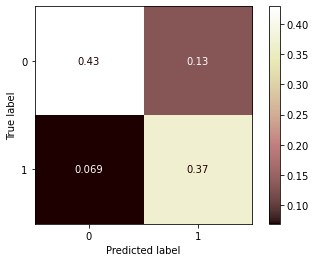

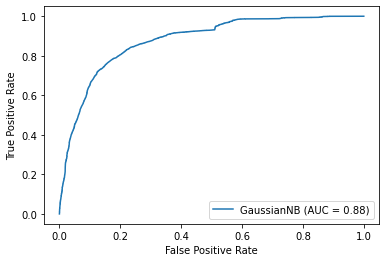

In [45]:
model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)


Accuracy = 0.8321527563905143
ROC Area under Curve = 0.8255234261710327
Time taken = 1.8208842277526855
              precision    recall  f1-score   support

           0    0.83092   0.87985   0.85469     14573
           1    0.83395   0.77120   0.80135     11403

    accuracy                        0.83215     25976
   macro avg    0.83244   0.82552   0.82802     25976
weighted avg    0.83225   0.83215   0.83127     25976



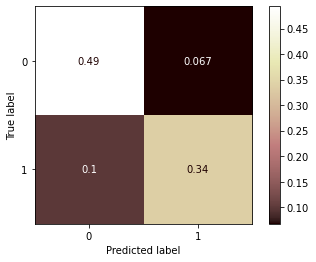

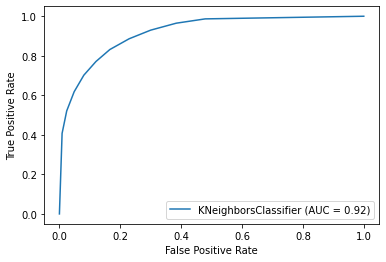

In [46]:

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)


In [47]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}


Accuracy = 0.8434708962118879
ROC Area under Curve = 0.8385864560797164
Time taken = 0.1112220287322998
              precision    recall  f1-score   support

           0    0.84789   0.87861   0.86298     14573
           1    0.83733   0.79856   0.81749     11403

    accuracy                        0.84347     25976
   macro avg    0.84261   0.83859   0.84023     25976
weighted avg    0.84326   0.84347   0.84301     25976



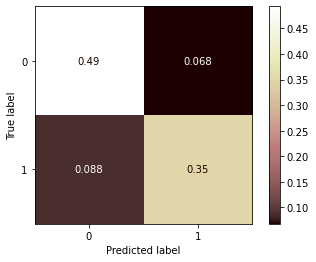

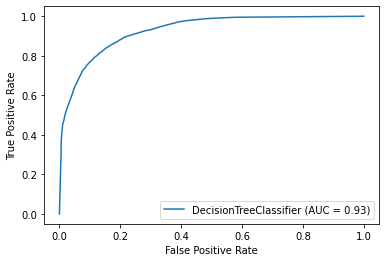

In [48]:
model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



In [49]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt]
tt = [tt_lr, tt_nb, tt_kn, tt_dt]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)


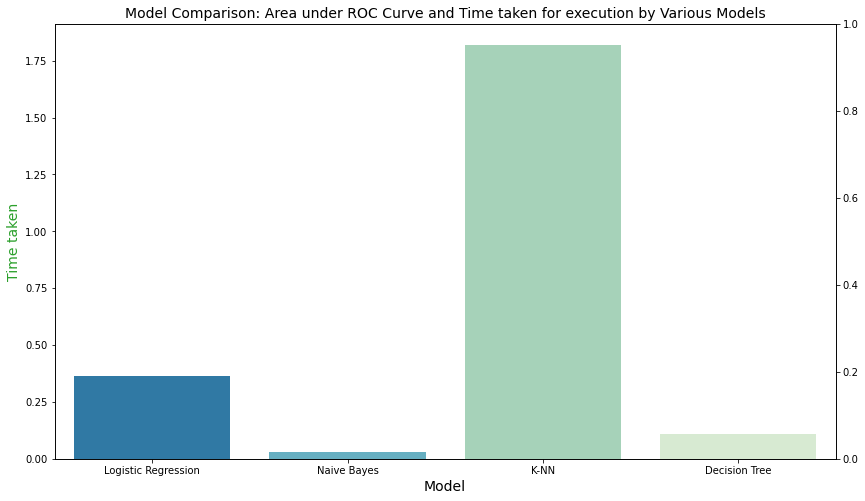

In [50]:
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()


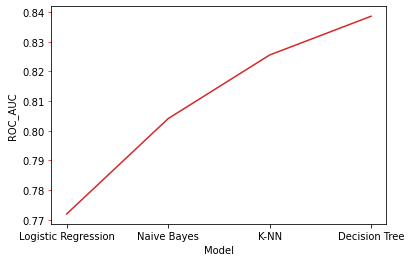

In [51]:
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
